In [1]:
import numpy as np
from scipy import integrate as intg 
from scipy import optimize as opt
from matplotlib import pyplot as plt 
import time 
import BQPDynamics as bqp
import Eilenberger as eil

plt.rcParams['font.size']=14
plt.rcParams['text.usetex']=True

In [ ]:
Tc = 1.

ntheta = 200
cutoff = 30.*eil.BCS_ratio*Tc
nw = 4000

fine_nw = None
fine_cutoff = None 
fine_nw = 100
fine_cutoff = 1.2*eil.BCS_ratio*Tc

ntemps = 5
temps = np.linspace(0.75,1.05,ntemps)

gaps = np.zeros((ntemps))
times = np.zeros_like(gaps)

sim = eil.Eilenberger(nw,ntheta,cutoff,fine_grid=(fine_nw,fine_cutoff))
print(sim.zero)
sim.verbose = True
sim.set_gamma_imp(0.01)
sim.set_Tc(1.)
sim.set_BCS_coupling(sim.BCS_coupling() )
grs = []

for i in range(ntemps):
    print(str(i))
    sim.set_temperature(temps[i])
    t0 = time.time()
    if i > 0:
        gr, gap = sim.calc_eq(grs[i-1],gaps[i-1])
        grs.append(gr)
        gaps[i] = np.abs(gap)
    else:
        gr,gap = sim.calc_eq()
        grs.append(gr)
        gaps[i] = np.abs(gap)
    t1 = time.time()
    times[i] = t1-t0


0.08466609546537818
0
A solution was found at the specified tolerance.
1


In [ ]:
plt.plot(temps,gaps[:],marker='.')
plt.show()
plt.plot(temps,times[:])
plt.yscale('log')
plt.show()

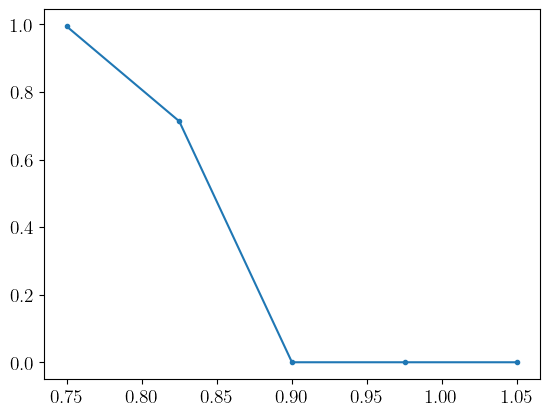

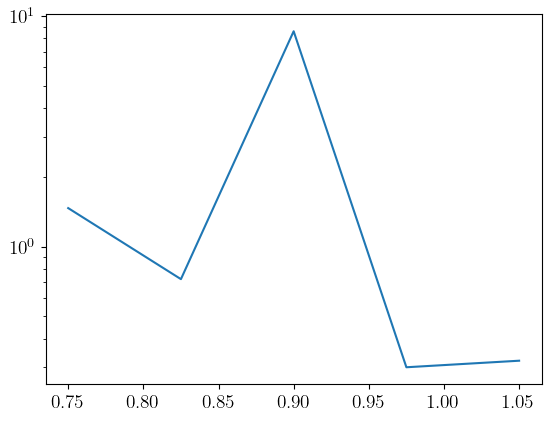

In [3]:
plt.plot(temps,gaps[:],marker='.')
plt.show()
plt.plot(temps,times[:])
plt.yscale('log')
plt.show()